In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_data_cleaned.csv')

In [3]:
df.head()

,Job Name,Company,Rating,Location,Salary,Description,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist I,VirginPulse,3.4,Remote,Employer Provided Salary:$95K,Overview:\nJoin Virgin Pulse Today!\n\nVirgin ...,-1,501 to 1000 Employees,2004,Company - Private,...,95.0,0.0,95.0,Remote,19,0,0,0,0,0
1,Junior Data Scientist,Choice Fitness,3.3,"Atlanta, GA",$71K - $102K (Glassdoor est.),"As a Junior Data Scientist, you will help supp...",-1,Unknown,-1,Company - Public,...,71.0,102.0,86.5,GA,-1,1,0,0,1,1
2,Data Scientist (REMOTE),"General Dynamics Mission Systems, Inc",3.8,Remote,Employer Provided Salary:$120K - $133K,Basic Qualifications :\nRequires a Bachelor’s ...,-1,10000+ Employees,1952,Subsidiary or Business Segment,...,120.0,133.0,126.5,Remote,71,0,0,0,0,1
3,Data Scientist Co-Op - Masters Degree - Fall 2023,Torc Robotics,4.3,"Austin, TX",Employer Provided Salary:$31.00 - $37.00 Per Hour,"About the Company\nAt Torc, we have always bel...",-1,501 to 1000 Employees,2007,Company - Private,...,31.0,37.0,34.0,TX,16,0,0,0,0,0
4,Junior Data Scientist,Club Quarters,3.2,"Stamford, CT",Employer Provided Salary:$80K - $100K,Club Quarters Application- US\n\nJunior Data S...,-1,501 to 1000 Employees,-1,Company - Private,...,80.0,100.0,90.0,CT,-1,0,0,0,0,0


In [4]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'AI' in title:
        return 'artificial intelligence'
    elif 'artificial intelligence' in title.lower():
        return 'artificial intelligence'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'head' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'associate' in title.lower():
        return 'jr'
    elif 'co-op' in title.lower():
        return 'co-op'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Name'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist             622
na                          18
analyst                      3
artificial intelligence      2
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Name'].apply(seniority)
df.seniority.value_counts()

na        421
jr        137
senior     67
co-op      20
Name: seniority, dtype: int64

In [9]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'massachusetts' else 'MA')
df.job_state.value_counts()

CA        153
Remote     99
VA         71
IL         49
MI         44
GA         44
TX         43
WI         23
MN         22
MA         21
MO         21
WA         15
FL          7
IA          5
NJ          5
DC          4
MS          3
NC          2
KS          2
CT          2
TN          2
MD          2
VT          1
AR          1
PA          1
AZ          1
NY          1
MT          1
Name: job_state, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Description'].apply(lambda x: len(x))
df['desc_len']

0       867
1      2209
2      1001
3       607
4       682
       ... 
640     734
641     719
642     916
643    1001
644    1178
Name: desc_len, Length: 645, dtype: int64

In [11]:
df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
3,1,62.00,74.00
11,1,140.00,160.00
18,1,30.00,40.00
22,1,130.00,0.00
29,1,48.36,84.62
37,1,110.00,130.00
44,1,140.00,160.00
48,1,120.00,130.00
84,1,110.00,130.00
92,1,102.00,104.00


In [13]:
df['avg_salary'] = df.apply(lambda row:(row['min_salary']+row['max_salary'])/2 if row['max_salary']>0 else row['min_salary'], axis=1)

In [14]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len
count,645.000000,645.0,645.000000,645.0,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.0,645.0,645.000000,645.000000,645.000000
mean,3.578295,-1.0,1449.914729,-1.0,0.068217,0.497674,90.852093,123.260775,109.435504,39.364341,0.221705,0.0,0.0,0.041860,0.179845,1034.406202
std,1.359848,0.0,869.712214,0.0,0.252314,0.500383,27.324044,48.219194,31.881432,48.888283,0.415716,0.0,0.0,0.200426,0.384356,611.998472
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.000000,30.000000,0.000000,35.000000,-1.000000,0.000000,0.0,0.0,0.000000,0.000000,156.000000
25%,3.500000,-1.0,-1.000000,-1.0,0.000000,0.000000,72.000000,99.000000,91.500000,-1.000000,0.000000,0.0,0.0,0.000000,0.000000,675.000000
50%,3.900000,-1.0,1960.000000,-1.0,0.000000,0.000000,85.000000,126.000000,108.500000,23.000000,0.000000,0.0,0.0,0.000000,0.000000,1001.000000
75%,4.100000,-1.0,1998.000000,-1.0,0.000000,1.000000,103.000000,147.000000,126.500000,56.000000,0.000000,0.0,0.0,0.000000,0.000000,1119.000000
max,5.000000,-1.0,2019.000000,-1.0,1.000000,1.000000,184.000000,283.000000,233.500000,322.000000,1.000000,0.0,0.0,1.000000,1.000000,6361.000000


In [15]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

<Axes: >

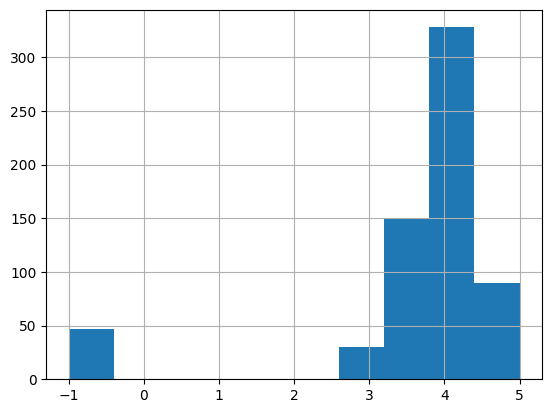

In [16]:
df.Rating.hist()

<Axes: >

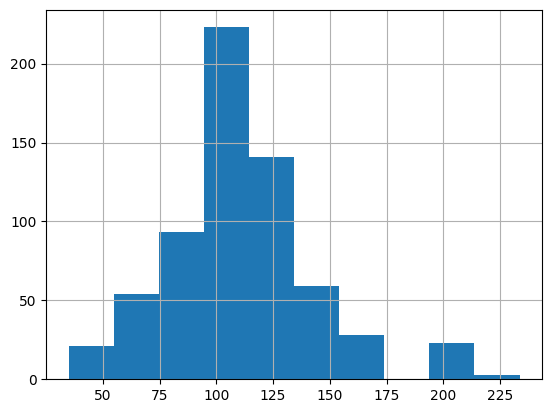

In [17]:
df.avg_salary.hist()

<Axes: >

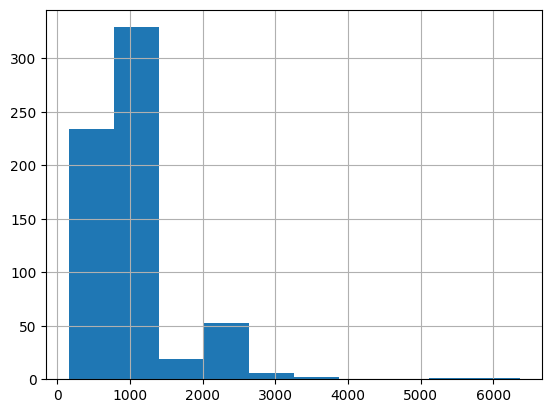

In [18]:
df.desc_len.hist()

<Axes: >

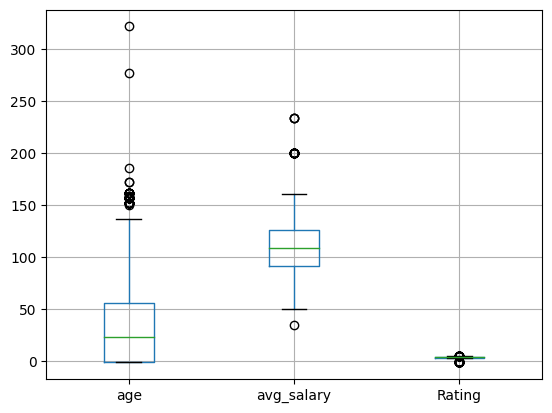

In [19]:
df.boxplot(column=['age','avg_salary','Rating'])

<Axes: >

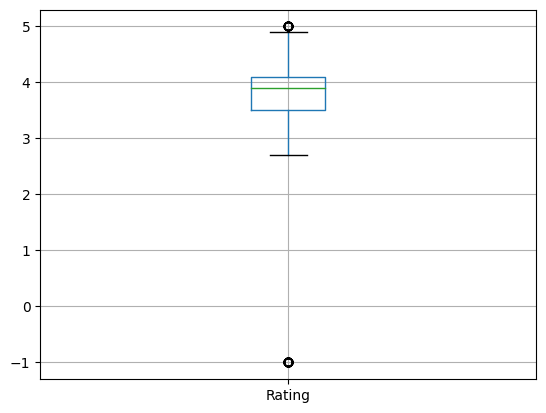

In [20]:
df.boxplot(column='Rating')

In [21]:
corr = df[['age','avg_salary','Rating','desc_len']].corr()

<Axes: >

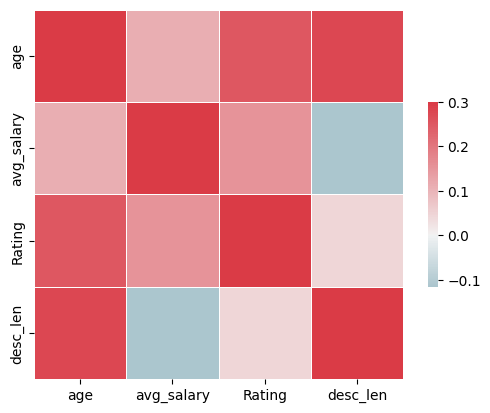

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [24]:
df.head()

,Job Name,Company,Rating,Location,Salary,Description,Headquarters,Size,Founded,Type of ownership,...,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len
0,Data Scientist I,VirginPulse,3.4,Remote,Employer Provided Salary:$95K,Overview:\nJoin Virgin Pulse Today!\n\nVirgin ...,-1,501 to 1000 Employees,2004,Company - Private,...,Remote,19,0,0,0,0,0,data scientist,na,867
1,Junior Data Scientist,Choice Fitness,3.3,"Atlanta, GA",$71K - $102K (Glassdoor est.),"As a Junior Data Scientist, you will help supp...",-1,Unknown,-1,Company - Public,...,GA,-1,1,0,0,1,1,data scientist,jr,2209
2,Data Scientist (REMOTE),"General Dynamics Mission Systems, Inc",3.8,Remote,Employer Provided Salary:$120K - $133K,Basic Qualifications :\nRequires a Bachelor’s ...,-1,10000+ Employees,1952,Subsidiary or Business Segment,...,Remote,71,0,0,0,0,1,data scientist,na,1001
3,Data Scientist Co-Op - Masters Degree - Fall 2023,Torc Robotics,4.3,"Austin, TX",Employer Provided Salary:$31.00 - $37.00 Per Hour,"About the Company\nAt Torc, we have always bel...",-1,501 to 1000 Employees,2007,Company - Private,...,TX,16,0,0,0,0,0,data scientist,co-op,607
4,Junior Data Scientist,Club Quarters,3.2,"Stamford, CT",Employer Provided Salary:$80K - $100K,Club Quarters Application- US\n\nJunior Data S...,-1,501 to 1000 Employees,-1,Company - Private,...,CT,-1,0,0,0,0,0,data scientist,jr,682


In [55]:
df_cat = df.filter(['Location', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue','Company','job_state','python_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority'], axis=1)

In [56]:
df_cat.head()

,Location,Size,Type of ownership,Industry,Sector,Revenue,Company,job_state,python_yn,aws_yn,excel_yn,job_simp,seniority
0,Remote,501 to 1000 Employees,Company - Private,Computer Hardware Development,Information Technology,$100 to $500 million (USD),VirginPulse,Remote,0,0,0,data scientist,na
1,"Atlanta, GA",Unknown,Company - Public,Beauty & Wellness,Personal Consumer Services,Unknown / Non-Applicable,Choice Fitness,GA,1,1,1,data scientist,jr
2,Remote,10000+ Employees,Subsidiary or Business Segment,Aerospace & Defense,Aerospace & Defense,$1 to $5 billion (USD),"General Dynamics Mission Systems, Inc",Remote,0,0,1,data scientist,na
3,"Austin, TX",501 to 1000 Employees,Company - Private,Software Development,Information Technology,$25 to $100 million (USD),Torc Robotics,TX,0,0,0,data scientist,co-op
4,"Stamford, CT",501 to 1000 Employees,Company - Private,Hotels & Resorts,Hotels & Travel Accommodation,Unknown / Non-Applicable,Club Quarters,CT,0,0,0,data scientist,jr


Graph for Location: total = 63


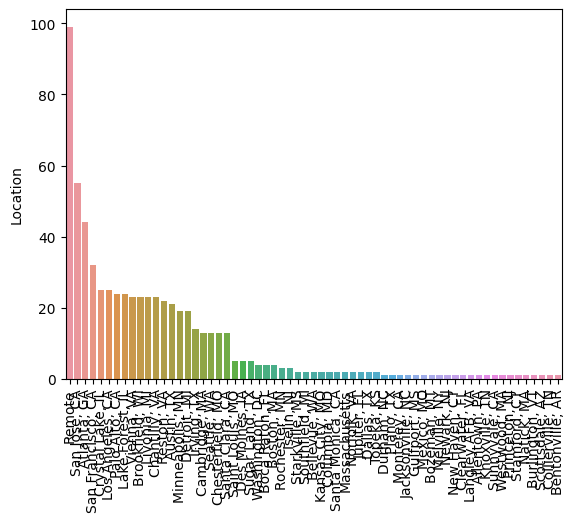

Graph for Size: total = 9


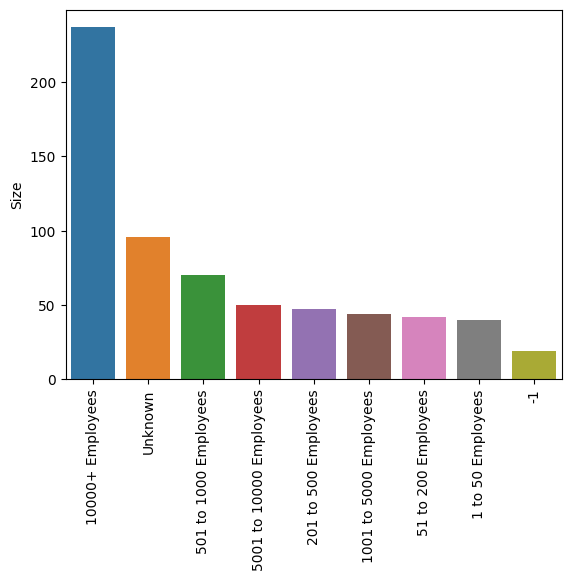

Graph for Type of ownership: total = 11


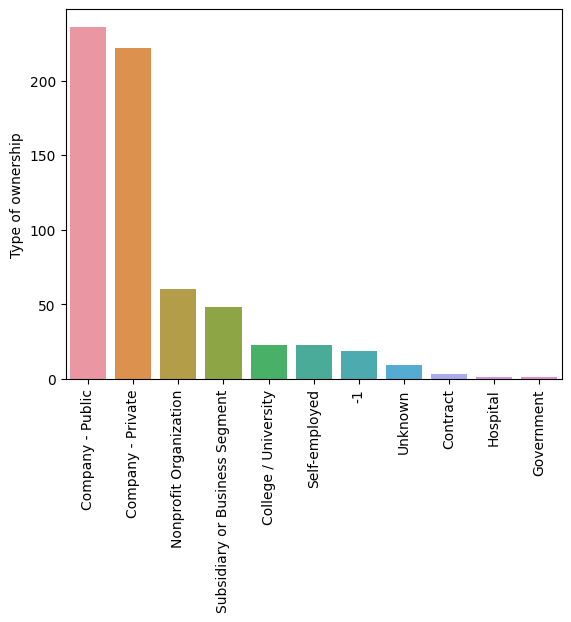

Graph for Industry: total = 38


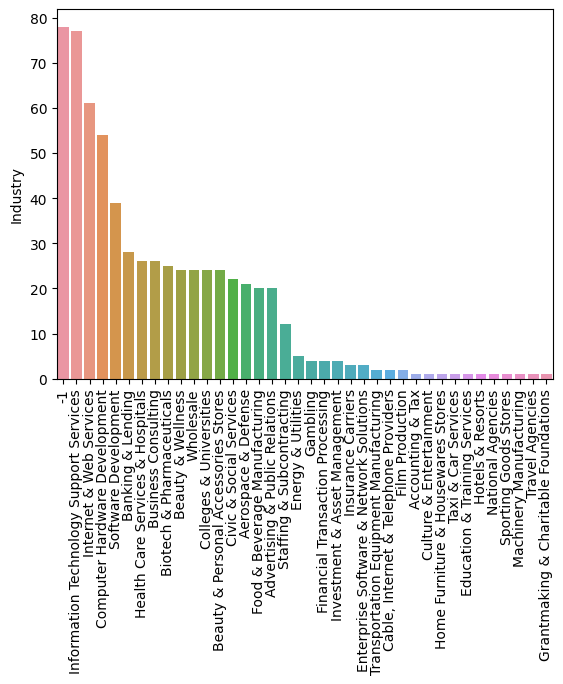

Graph for Sector: total = 21


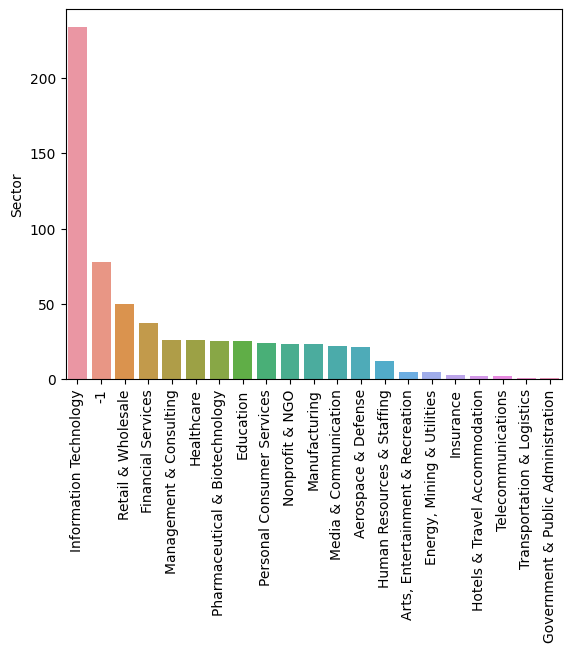

Graph for Revenue: total = 11


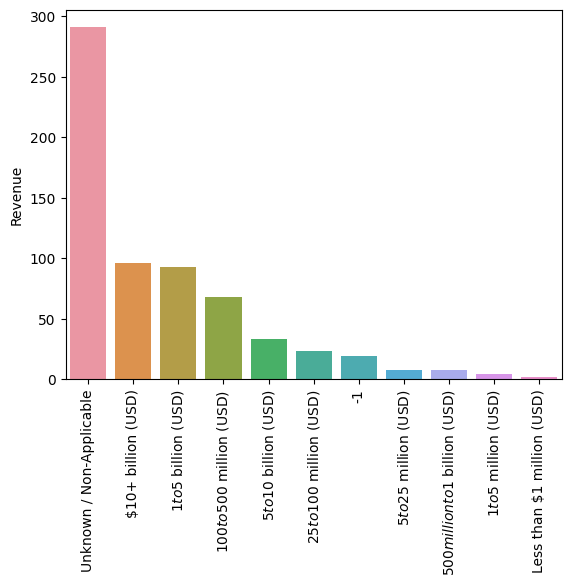

Graph for Company: total = 97


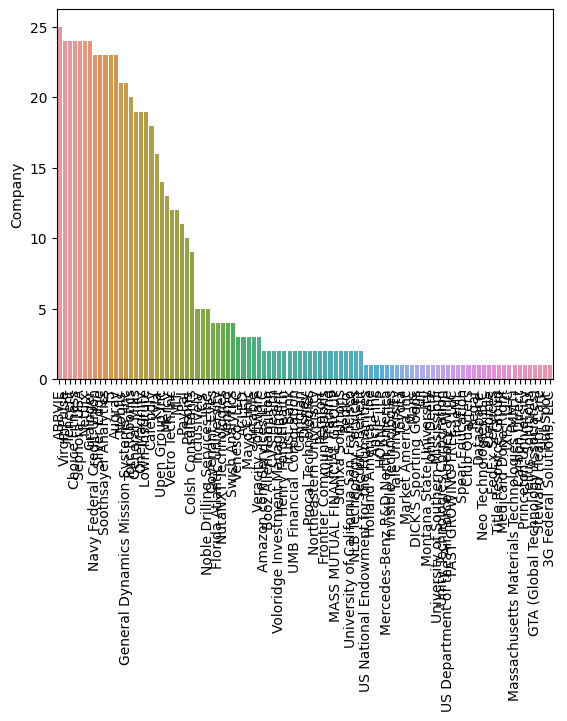

Graph for job_state: total = 28


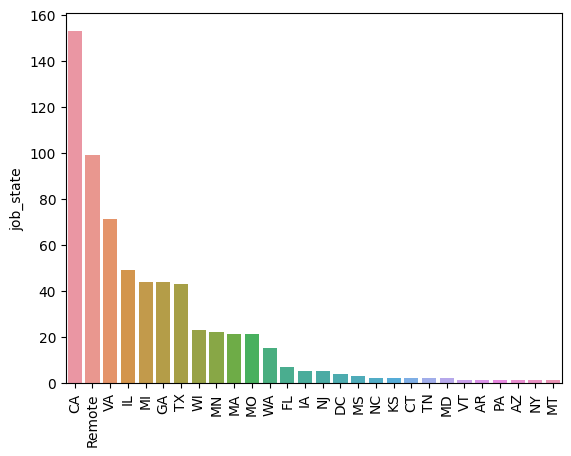

Graph for python_yn: total = 2


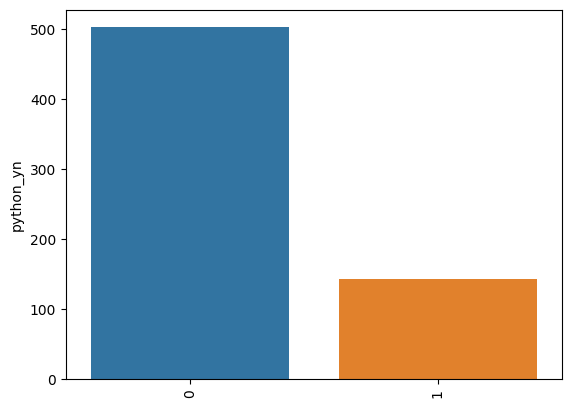

Graph for aws_yn: total = 2


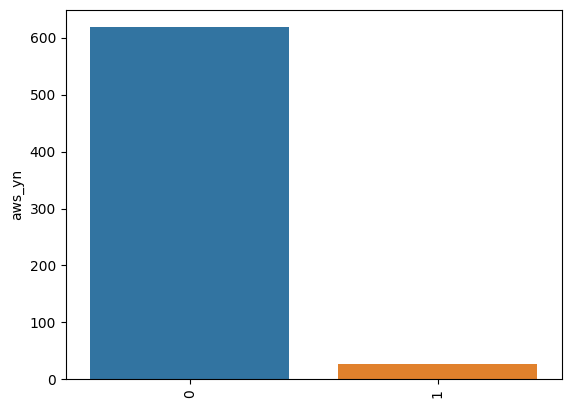

Graph for excel_yn: total = 2


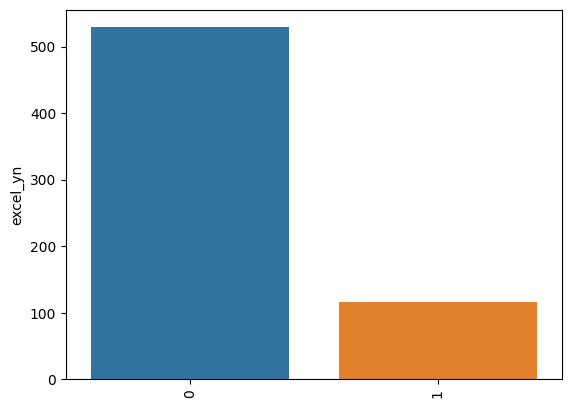

Graph for job_simp: total = 4


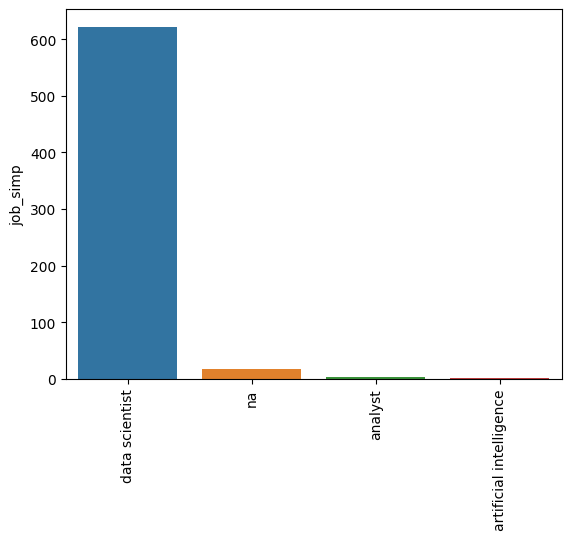

Graph for seniority: total = 4


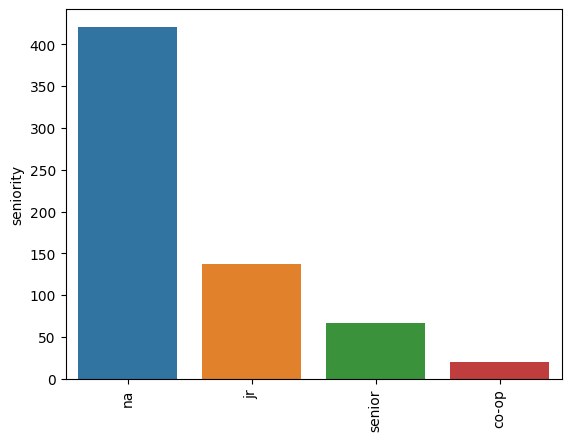

In [57]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i,len(cat_num)))
    my_plot=sns.barplot(x=cat_num.index,y=cat_num)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 43


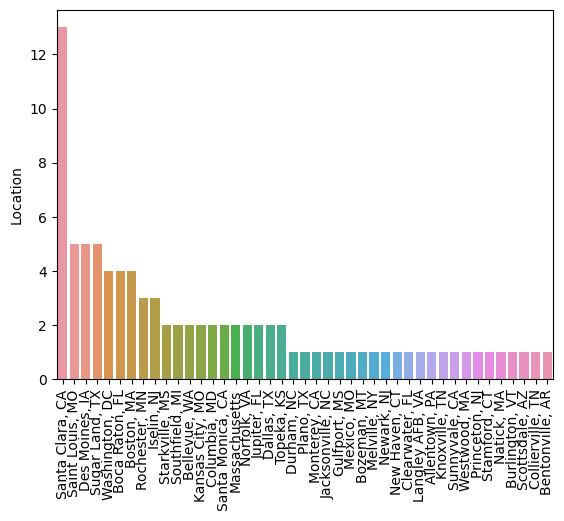

Graph for job_state: total = 8


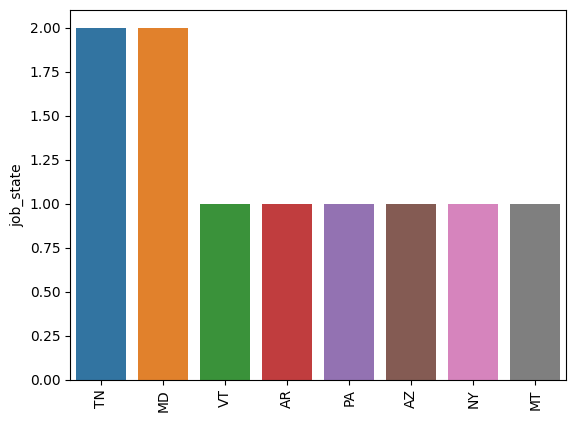

Graph for Company: total = 77


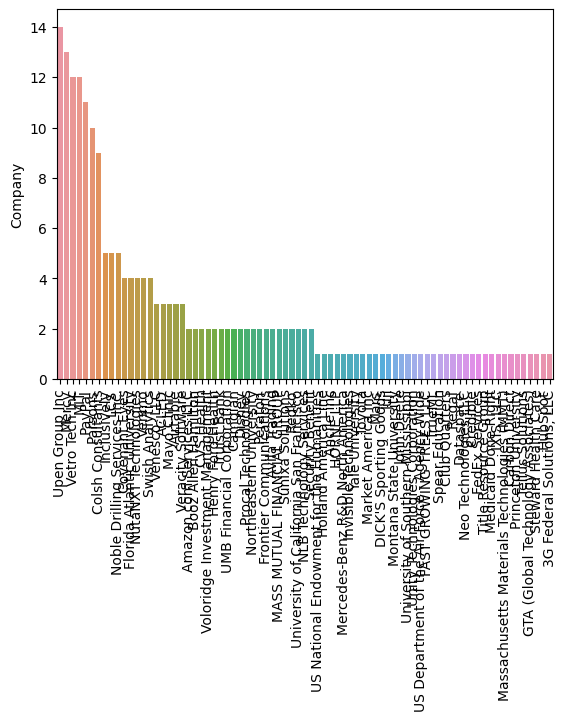

In [58]:
for i in df_cat[['Location','job_state','Company']]:
    cat_num = df_cat[i].value_counts()[20:]
    print('Graph for %s: total = %d' % (i,len(cat_num)))
    my_plot=sns.barplot(x=cat_num.index,y=cat_num)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
    plt.show()

In [59]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [60]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,114.500000
artificial intelligence,83.250000
data scientist,109.001447
na,126.500000


In [61]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp                seniority            
analyst                 na         114.500000
artificial intelligence na          83.250000
data scientist          co-op       68.000000
                        jr          89.682482
                        na         111.616346
                        senior     157.551020
na                      senior     126.500000

In [62]:
pd.pivot_table(df, index=['job_state','seniority'], values='avg_salary').sort_values('avg_salary',ascending = False)

,,avg_salary
job_state,seniority,
CA,senior,195.442308
PA,na,150.000000
Remote,senior,149.500000
MD,jr,145.500000
CA,na,144.557471
DC,na,142.000000
FL,senior,139.000000
AR,na,130.000000
GA,senior,126.500000


In [63]:
pd.pivot_table(df, index='job_state', values='avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
PA,150.000000
MD,145.500000
CA,142.392157
AR,130.000000
NC,121.500000
IA,120.000000
AZ,112.500000
VA,111.464789
MA,111.428571


In [64]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [65]:
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary').sort_values('job_state',ascending = False)

avg_salary
job_state job_simp                           
WI        data scientist            57.500000
WA        data scientist            96.433333
VT        data scientist           109.500000
VA        data scientist           111.464789
TX        data scientist            72.081395
TN        data scientist           105.000000
Remote    data scientist           104.289796
          artificial intelligence   35.000000
PA        data scientist           150.000000
NY        data scientist            95.000000
NJ        data scientist           100.000000
NC        data scientist           121.500000
MT        data scientist            51.000000
MS        data scientist            70.500000
MO        data scientist            96.404762
MN        data scientist           108.500000
          analyst                  114.500000
MI        data scientist           107.875000
MD        data scientist           145.500000
MA        data scientist           111.428571
KS        data scientist           102.500000
IL        data scientist            93.948980
IA        data scientist           120.000000
GA        na                       126.500000
          data scientist            89.000000
FL        data scientist            76.500000
DC        data scientist           102.625000
CT        data scientist            98.500000
CA        data scientist           142.463816
          artificial intelligence  131.500000
AZ        data scientist           112.500000
AR        data scientist           130.000000

In [66]:
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                           
WI        data scientist                   23
WA        data scientist                   15
VT        data scientist                    1
VA        data scientist                   71
TX        data scientist                   43
TN        data scientist                    2
Remote    data scientist                   98
          artificial intelligence           1
PA        data scientist                    1
NY        data scientist                    1
NJ        data scientist                    5
NC        data scientist                    2
MT        data scientist                    1
MS        data scientist                    3
MO        data scientist                   21
MN        data scientist                   19
          analyst                           3
MI        data scientist                   44
MD        data scientist                    2
MA        data scientist                   21
KS        data scientist                    2
IL        data scientist                   49
IA        data scientist                    5
GA        na                               18
          data scientist                   26
FL        data scientist                    7
DC        data scientist                    4
CT        data scientist                    2
CA        data scientist                  152
          artificial intelligence           1
AZ        data scientist                    1
AR        data scientist                    1

In [67]:
df.columns

Index(['Job Name', 'Company', 'Rating', 'Location', 'Salary', 'Description',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [70]:
df_pivots = df[['Rating', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'hourly', 'employer provided',
       'python_yn', 'aws_yn', 'excel_yn','avg_salary']]

In [71]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 3.7    165.000000
 3.6    143.040816
 4.7    139.000000
 4.9    135.500000
 4.5    133.200000
 4.1    131.115789
 4.2    125.687500
 3.1    120.000000
 4.4    118.350000
 3.8    115.596774
 4.8    112.166667
 4.6    109.000000
 4.3    108.806452
 2.7    105.000000
 3.5    104.455882
 4.0    100.400000
 5.0     99.464286
 3.4     98.338710
 2.9     97.000000
-1.0     94.340426
 3.3     92.178571
 3.2     90.000000
 3.9     82.406522
 3.0     75.000000
Size
                         avg_salary
Size                               
5001 to 10000 Employees  168.610000
1 to 50 Employees        115.375000
1001 to 5000 Employees   114.159091
201 to 500 Employees     111.925532
10000+ Employees         110.664135
501 to 1000 Employees     98.035714
Unknown                   96.802083
51 to 200 Employees       83.535714
-1                        71.868421
Type of ownership
                                avg_salary
Type of ownership                    

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [72]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),93.0,NaN
$1 to $5 million (USD),2.0,2.0
$10+ billion (USD),45.0,51.0
$100 to $500 million (USD),67.0,1.0
$25 to $100 million (USD),21.0,2.0
$5 to $10 billion (USD),31.0,2.0
$5 to $25 million (USD),8.0,NaN
$500 million to $1 billion (USD),8.0,NaN
-1,19.0,NaN


In [85]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aman_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

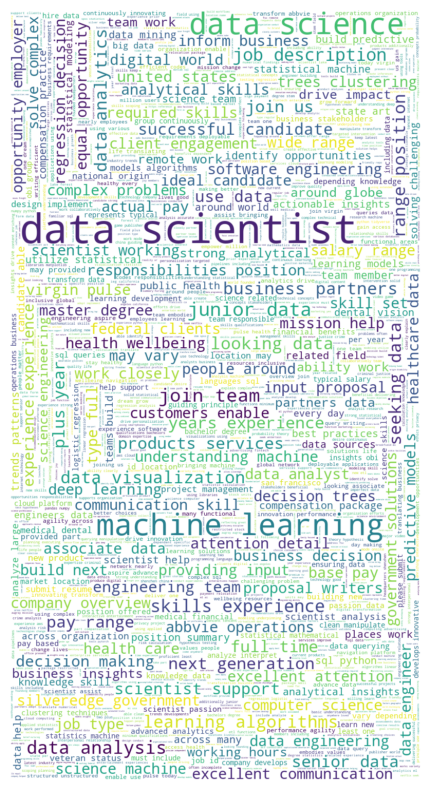

In [86]:
words = " ".join(df['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()